### Use Random Forest to prepare a model on fraud data 
#### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud = pd.read_csv("C:/Users/sansk/Downloads/Fraud_check (2).csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
f1=np.empty(600, dtype=object)
i=0

for value in fraud['Taxable.Income']:
    if value<=30000:
        f1[i]='Risky'
    else:
        f1[i]='Good'
    i=i+1    

In [4]:
t1=pd.DataFrame(f1,columns=['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [5]:
fraud_1 = pd.concat([fraud,t1],axis=1)
fraud_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
fraud_1.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
Target             object
dtype: object

In [7]:
fraud_1.shape

(600, 7)

In [8]:
fraud_1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Label_Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
fraud_1["Undergrad"] = label_encoder.fit_transform(fraud_1["Undergrad"])
fraud_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,Single,68833,50047,10,YES,Good
1,1,Divorced,33700,134075,18,YES,Good
2,0,Married,36925,160205,30,YES,Good
3,1,Single,50190,193264,15,YES,Good
4,0,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,YES,Good
596,1,Divorced,69967,55369,2,YES,Good
597,0,Divorced,47334,154058,0,YES,Good
598,1,Married,98592,180083,17,NO,Good


In [11]:
fraud_1["Marital.Status"] = label_encoder.fit_transform(fraud_1["Marital.Status"])

fraud_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,YES,Good
1,1,0,33700,134075,18,YES,Good
2,0,1,36925,160205,30,YES,Good
3,1,2,50190,193264,15,YES,Good
4,0,1,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,YES,Good
596,1,0,69967,55369,2,YES,Good
597,0,0,47334,154058,0,YES,Good
598,1,1,98592,180083,17,NO,Good


In [12]:
fraud_1["Urban"] = label_encoder.fit_transform(fraud_1["Urban"])

fraud_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [13]:
fraud_1["Target"] = label_encoder.fit_transform(fraud_1["Target"])
fraud_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


In [14]:
fraud_1.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
Target             int32
dtype: object

## Visualisation

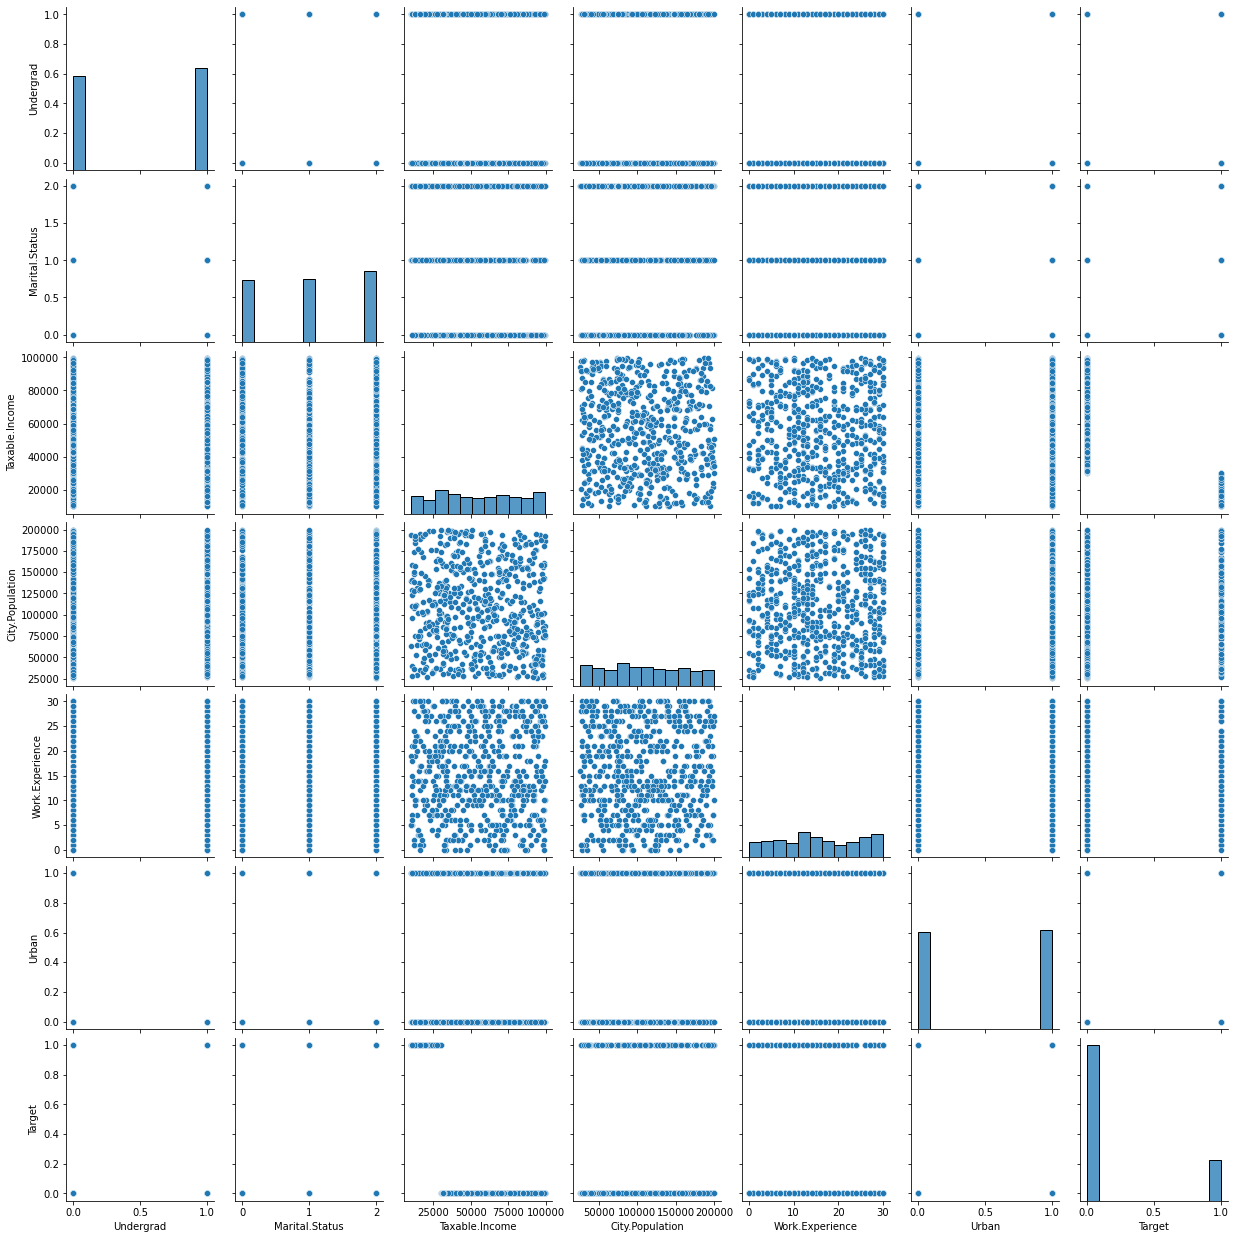

In [15]:
import seaborn as sns 
sns.pairplot(fraud_1)

In [16]:
fraud_1.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562,0.006081
Taxable.Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628,-0.688725
City.Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000,0.004830
Target,0.012523,0.006081,-0.688725,0.012225,-0.001972,0.004830,1.000000


<AxesSubplot:xlabel='Taxable.Income', ylabel='Target'>

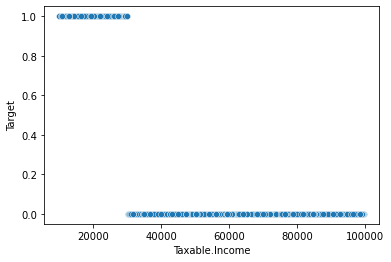

In [17]:
sns.scatterplot(fraud_1["Taxable.Income"], fraud_1["Target"])

<AxesSubplot:xlabel='Taxable.Income', ylabel='Target'>

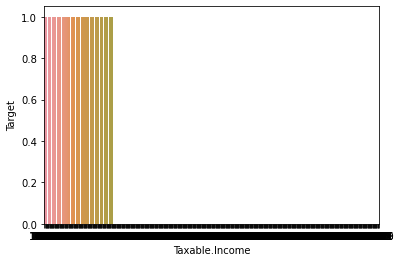

In [18]:
sns.barplot(fraud_1["Taxable.Income"], fraud_1["Target"])

## Random Forest Classifier

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
x = fraud_1.iloc[:,0:5]
y = fraud_1[["Target"]]



In [21]:
x.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,0,2,68833,50047,10
1,1,0,33700,134075,18
2,0,1,36925,160205,30
3,1,2,50190,193264,15
4,0,1,81002,27533,28


In [22]:
y.tail()

,Target
595,0
596,0
597,0
598,0
599,0


In [23]:
num_trees = 78
max_features = 4

In [24]:
kfold = KFold(n_splits=8, random_state= 37, shuffle=True)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [25]:
results = cross_val_score(model1, x, y, cv=kfold)
print(results.mean())


0.9983333333333333


### Random forest classifier

In [26]:
numpy_trees = 60 
max_feature = 6

In [27]:
kfold = KFold(n_splits=6, random_state= 27, shuffle=True)
model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

In [28]:
results = cross_val_score(model2, x, y, cv=kfold)
print(results.mean())


0.9983333333333334
